# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 0 total human images.
There are 0 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

ModuleNotFoundError: No module named 'cv2'

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

Percent human images with human face detected: 98%
<br>Percent dog images with human face detected: 14%

In [6]:
from tqdm import tqdm_notebook as tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

count_face_hum = 0
count_face_dog = 0

for i in tqdm(range(0,100)):
    if face_detector(human_files_short[i]):
        count_face_hum += 1
        
for i in tqdm(range(0,100)):
    if face_detector(dog_files_short[i]):
        count_face_dog += 1
        
print('Proportion human images with human face detected:', count_face_hum / 100)
print('Proportion dog images with human face detected:', count_face_dog / 100)



Proportion human images with human face detected: 0.98
Proportion dog images with human face detected: 0.14


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [ ]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/daltonschutte/.torch/models/vgg16-397923af.pth
  1%|          | 4308992/553433881 [01:06<1:38:05, 93300.25it/s] 

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485, 0.456, 0.406],
                                                              [0.229, 0.224, 0.225])
                                         ])
    
    img = Image.open(img_path)
    img = data_transform(img).float()
    img = img.unsqueeze(0)
    
    if use_cuda:
        img = img.cuda()
    
    prediction = VGG16(img)
    
    return prediction.argmax()

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    
    pred = VGG16_predict(img_path)
    
    if pred > 150 and pred < 269:
        dog_detected = True
    else:
        dog_detected = False
    
    return dog_detected

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

Percent human images with dog detected: 0%
<br>Percent dog images with dog detected: 99%

In [10]:
count_hum = 0
count_dog = 0

for i in tqdm(range(0,100)):
    if dog_detector(human_files_short[i]):
        count_hum += 1
        
for i in tqdm(range(0,100)):
    if dog_detector(dog_files_short[i]):
        count_dog += 1

print('Proportion human images with dog detected:', count_hum / 100)
print('Proportion dog images with dog detected:', count_dog / 100)


Proportion human images with dog detected: 0.01
Proportion dog images with dog detected: 0.97


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
Inception_v3 = models.inception_v3(pretrained=True)

if use_cuda:
    Inception_v3 = Inception_v3.cuda()

Inception_v3.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [12]:
def Inception_predict(img_path):
    """
        Use pre-trained Inception v3 model to obtain index corresponding to predicted
        ImageNet class for image at specified path
        
        Args:
            img_path := path to an image
            
        Returns:
            Index corresponding to Inception v3 model's prediction
    """
    
    data_transform = transforms.Compose([transforms.RandomResizedCrop(299),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485, 0.456, 0.406],
                                                              [0.229, 0.224, 0.225])
                                         ])
    
    img = Image.open(img_path)
    img = data_transform(img).float()
    img = img.unsqueeze(0)
    
    if use_cuda:
        img = img.cuda()
    
    prediction = Inception_v3(img)
    
    return prediction.argmax()

In [ ]:
def dog_detector_gen(img_path, model):
    
    pred = model(img_path)
    
    if pred > 150 and pred < 269:
        dog_detected = True
    else:
        dog_detected = False
        
    return dog_detected

In [14]:
human_count = 0
dog_count = 0

for i in tqdm(range(0,100)):
    if dog_detector_gen(human_files_short[i], Inception_predict):
        human_count += 1
        
for i in tqdm(range(0,100)):
    if dog_detector_gen(dog_files_short[i], Inception_predict):
        dog_count += 1
        
print('Proportion human images with dog detected:', human_count / 100)
print('Proportion dog images with dog detected:', dog_count / 100)


Proportion human images with dog detected: 0.01
Proportion dog images with dog detected: 0.98


In [ ]:
ResNet34 = models.resnet34(pretrained=True)

if use_cuda:
    ResNet34 = ResNet34.cuda()
    
ResNet34.eval()

In [16]:
def ResNet34_predict(img_path):
    """
        Use pre-trained Inception v3 model to obtain index corresponding to predicted
        ImageNet class for image at specified path
        
        Args:
            img_path := path to an image
            
        Returns:
            Index corresponding to Inception v3 model's prediction
    """
    
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485, 0.456, 0.406],
                                                              [0.229, 0.224, 0.225])
                                         ])
    
    img = Image.open(img_path)
    img = data_transform(img).float()
    img = img.unsqueeze(0)
    
    if use_cuda:
        img = img.cuda()
    
    prediction = ResNet34(img)
    
    return prediction.argmax()

In [17]:
human_count = 0
dog_count = 0

for i in tqdm(range(0,100)):
    if dog_detector_gen(human_files_short[i], ResNet34_predict):
        human_count += 1
        
for i in tqdm(range(0,100)):
    if dog_detector_gen(dog_files_short[i], ResNet34_predict):
        dog_count += 1
        
print('Proportion human images with dog detected:', human_count / 100)
print('Proportion dog images with dog detected:', dog_count / 100)


Proportion human images with dog detected: 0.02
Proportion dog images with dog detected: 0.99


In [18]:
def gen_predict(img_path, model):
    """
        Use pre-trained Inception v3 model to obtain index corresponding to predicted
        ImageNet class for image at specified path
        
        Args:
            img_path := path to an image
            
        Returns:
            Index corresponding to Inception v3 model's prediction
    """
    
    if model == Inception_v3:
        SIZE = 299
    else:
        SIZE =224
    
    data_transform = transforms.Compose([transforms.RandomResizedCrop(SIZE),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485, 0.456, 0.406],
                                                              [0.229, 0.224, 0.225])
                                         ])
    
    img = Image.open(img_path)
    img = data_transform(img).float()
    img = img.unsqueeze(0)
    
    if use_cuda:
        img = img.cuda()
    
    prediction = model(img)
    
    return prediction.argmax()

In [19]:
models = [VGG16_predict, Inception_predict, ResNet34_predict]

In [20]:
import time

trials = 10

scores = []
times = []

for model in models:
    for i in tqdm(range(0, trials)):
        start = time.time()
        
        count_hum = 0
        count_dog = 0

        for i in range(0,100):
            if dog_detector_gen(human_files_short[i], model):
                count_hum += 1

        for i in range(0,100):
            if dog_detector_gen(dog_files_short[i], model):
                count_dog += 1
        
        scores.append([count_hum/100, count_dog/100])
        times.append(time.time()-start)

In [21]:
scores_vgg = np.asarray(scores[0:9])
scores_inception = np.asarray(scores[10:19])
scores_resnet = np.asarray(scores[20:29])

In [22]:
times_vgg = np.asarray(times[0:9])
times_inception = np.asarray(times[10:19])
times_resnet = np.asarray(times[20:29])

In [23]:
vgg_stats = (np.max(scores_vgg[:,0]), 
             np.average(scores_vgg[:,0]), 
             np.max(scores_vgg[:,1]), 
             np.average(scores_vgg[:,1]))

inception_stats = (np.max(scores_inception[:,0]), 
                   np.average(scores_inception[:,0]), 
                   np.max(scores_inception[:,1]), 
                   np.average(scores_inception[:,1]))

resnet_stats = (np.max(scores_resnet[:,0]), 
                np.average(scores_resnet[:,0]), 
                np.max(scores_resnet[:,1]), 
                np.average(scores_resnet[:,1]))

In [24]:
vgg_time_stats = (np.min(times_vgg), np.average(times_vgg), np.max(times_vgg))
inception_time_stats = (np.min(times_inception), np.average(times_inception), np.max(times_inception))
resnet_time_stats = (np.min(times_resnet), np.average(times_resnet), np.max(times_resnet))

In [25]:
print("(Max prop human with dog, Average prop human with dog, Max prop dog with dog, Average prop dog with dog)")
print("VGG16 statistics:", vgg_stats)
print("Inception v3 statistics:", inception_stats)
print("ResNet34 statistics:", resnet_stats)
print("\n(Min Trial Time, Average Trial Time, Max Trial Time)")
print("VGG16 time stats:", vgg_time_stats)
print("Inception v3 time stats:", inception_time_stats)
print("Resnet34 time stats:", resnet_time_stats)

(Max prop human with dog, Average prop human with dog, Max prop dog with dog, Average prop dog with dog)
VGG16 statistics: (0.06, 0.02888888888888889, 0.99, 0.9766666666666668)
Inception v3 statistics: (0.03, 0.012222222222222223, 1.0, 0.9877777777777779)
ResNet34 statistics: (0.03, 0.007777777777777778, 0.99, 0.9811111111111112)

(Min Trial Time, Average Trial Time, Max Trial Time)
VGG16 time stats: (7.1322832107543945, 7.1638721625010175, 7.203735113143921)
Inception v3 time stats: (8.308194875717163, 8.322670194837782, 8.334382772445679)
Resnet34 time stats: (4.763206958770752, 4.78039370642768, 4.79706883430481)


__Results__:

After running 10 tests for each of the VGG16, Inception v3, and ResNet34 architectures using the short human and short dog files, the results shown above show that ResNet34 was decidedly the fastest architecture as well as having the lowest average proportion of human images with a dog detected. The Inception v3 architecture was the slowest and had the highest average proportion of dog images with a dog detected.

As such, I will use the ResNet34 architecture as the model in the dog detector.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [ ]:
import os
from PIL import ImageFile
from torchvision import datasets

ImageFile.LOAD_TRUNCATED_IMAGES = True

BATCH_SIZE = 32

data_transform = transforms.Compose([transforms.RandomResizedCrop(299),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.RandomRotation(10),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])
                                     ])

cwd = '/home/ubuntu/deep-learning-v2-pytorch/project-dog-classification'

train_dir = '/dogImages/train/'
valid_dir = '/dogImages/valid/'
test_dir = '/dogImages/test/'

train_data = datasets.ImageFolder(cwd+train_dir, transform=data_transform)
valid_data = datasets.ImageFolder(cwd+valid_dir, transform=data_transform)
test_data = datasets.ImageFolder(cwd+test_dir, transform=data_transform)

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=BATCH_SIZE,
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data,
                                           batch_size=BATCH_SIZE,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

loaders_scratch = dict({'train':train_loader, 
                        'valid':valid_loader, 
                        'test':test_loader
                        })

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

The code re-sizes the images to 299x299 for the Inception architecture. The input tensor is a batch of 32 images of dimensions 299x299x3, this size was chosen to balance training time against available memory and to fit nicely into the Inception v3 architecture that I decided on.

I did augment the dataset using horizontal flips and rotations between -10 and 10 degrees.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 2, padding=0)
        self.conv2 = nn.Conv2d(32, 32, 3, 1, padding=0)
        self.conv3 = nn.Conv2d(32, 64, 3, 1, padding=1)
        self.pool1 = nn.MaxPool2d(3, 2)
        self.conv4 = nn.Conv2d(64, 80, 3, 1, padding=0)
        self.conv5 = nn.Conv2d(80, 104, 3, 2, padding=0)
        self.conv6 = nn.Conv2d(104, 128, 3, 1, padding=0)
        self.pool2 = nn.MaxPool2d(3, 2)
        
        
        #Inception C (Fig 7 in Szegedy et al.)
        self.incepC_1_1 = nn.Conv2d(128, 64, 1, 2, padding=0)
        
        self.incepC_2_1 = nn.MaxPool2d(2, 2)
        self.incepC_2_2 = nn.Conv2d(128, 64, 1, 1, padding=0)
        
        self.incepC_3_1 = nn.Conv2d(128, 64, 1, 2, padding=0)
        self.incepC_3_2_a = nn.Conv2d(64, 64, (3,1), 1, padding=(1,0))
        self.incepC_3_2_b = nn.Conv2d(64, 64, (1,3), 1, padding=(0,1))
        
        self.incepC_4_1 = nn.Conv2d(128, 64, 1, 2, padding=0)
        self.incepC_4_2 = nn.Conv2d(64, 64, 3, 1, padding=1)
        self.incepC_4_3_a = nn.Conv2d(64, 64, (3,1), 1, padding=(1,0))
        self.incepC_4_3_b = nn.Conv2d(64, 64, (1,3), 1, padding=(0,1))
        
        self.pool3 = nn.MaxPool2d(8, 8)
        
        self.fc1 = nn.Linear(6*64, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, 133)
        self.dropout = nn.Dropout(0.2)
                               
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool1(F.relu(self.conv3(x)))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pool2(self.conv6(x))

        x1 = x.clone()
        x1 = F.relu(self.incepC_1_1(x1))
        
        x2 = x.clone()
        x2 = F.relu(self.incepC_2_2(self.incepC_2_1(x2)))
        
        x3 = x.clone()
        x3 = F.relu(self.incepC_3_1(x3))
        x3a = x3.clone()
        x3a = F.relu(self.incepC_3_2_a(x3a))
        x3b = x3.clone()
        x3b = F.relu(self.incepC_3_2_a(x3b))
        
        x4 = x.clone()
        x4 = F.relu(self.incepC_4_1(x4))
        x4 = F.relu(self.incepC_4_2(x4))
        x4a = x4.clone()
        x4a = F.relu(self.incepC_4_3_a(x4a))
        x4b = x4.clone()
        x4b = F.relu(self.incepC_4_3_b(x4b))
        
        x = torch.cat([x1, x2, x3a, x3b, x4a, x4b], dim=2)
        x = self.pool3(x)
        
        x = x.view(-1, 6*64)
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
#print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I wanted to try something more interesting than a simple LeCunn type architecture and the Inception architecture seemed like a good challenge that would also be able to preform feature extraction well. The fact that the full Inception v3 architecture had the highest average score for predicting if a dog was in an image pulled from a set of images containing dogs also influenced me to investigate this architecture further.

I ultimately decided to only use a single inception unit in my model, for computation purposes, and settled on the third inception unit described in the Szegedy et al. paper, figure 7 gives a detailed view of the unit. From the Inception v3 architecture I decided to use the first six layers as described in the paper, with some minor variations to suit my purposes. A global average pooling layer was used and was fed into a three layer fully connected network with dropout.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [ ]:
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()

optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01, momentum=0.9, nesterov=True, weight_decay=1e-4)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [29]:
import numpy as np
from tqdm import tqdm_notebook as tqdm

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in tqdm(range(1, n_epochs+1)):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * data.size(0)
            
        train_loss = train_loss / len(train_loader.dataset)
            
        ######################    
        # validate the model #
        ######################
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss += loss.item() * data.size(0)
            
        valid_loss = valid_loss / len(valid_loader.dataset)
                           
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
    # return trained model
    return model

In [30]:
def weights_init(m):
    '''
        Takes in a module and initializes all linear layers with weight
       values taken from a normal distribution.
    '''
    
    classname = m.__class__.__name__
    if classname.find('Linear') !=-1:
        n = m.in_features
        y = 1.0 / np.sqrt(n)
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)

In [31]:
model_scratch.apply(weights_init)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 80, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(80, 104, kernel_size=(3, 3), stride=(2, 2))
  (conv6): Conv2d(104, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (incepC_1_1): Conv2d(128, 64, kernel_size=(1, 1), stride=(2, 2))
  (incepC_2_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (incepC_2_2): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
  (incepC_3_1): Conv2d(128, 64, kernel_size=(1, 1), stride=(2, 2))
  (incepC_3_2_a): Conv2d(64, 64, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0))
  (incepC_3_2_b): Conv2d(64, 64, kernel_size=(1, 3), stride=(1,

In [32]:
use_cuda

True

In [33]:
# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 4.886953 	Validation Loss: 4.878882
Validation loss decreased (inf --> 4.878882).  Saving model ...
Epoch: 2 	Training Loss: 4.876806 	Validation Loss: 4.872160
Validation loss decreased (4.878882 --> 4.872160).  Saving model ...
Epoch: 3 	Training Loss: 4.870464 	Validation Loss: 4.871356
Validation loss decreased (4.872160 --> 4.871356).  Saving model ...
Epoch: 4 	Training Loss: 4.869055 	Validation Loss: 4.870640
Validation loss decreased (4.871356 --> 4.870640).  Saving model ...
Epoch: 5 	Training Loss: 4.868773 	Validation Loss: 4.869112
Validation loss decreased (4.870640 --> 4.869112).  Saving model ...
Epoch: 6 	Training Loss: 4.867174 	Validation Loss: 4.866291
Validation loss decreased (4.869112 --> 4.866291).  Saving model ...
Epoch: 7 	Training Loss: 4.862864 	Validation Loss: 4.860755
Validation loss decreased (4.866291 --> 4.860755).  Saving model ...
Epoch: 8 	Training Loss: 4.852604 	Validation Loss: 4.846997
Validation loss decreased (4.86075

Epoch: 89 	Training Loss: 2.348688 	Validation Loss: 2.678866
Epoch: 90 	Training Loss: 2.383741 	Validation Loss: 2.926476
Epoch: 91 	Training Loss: 2.344979 	Validation Loss: 2.770711
Epoch: 92 	Training Loss: 2.335516 	Validation Loss: 2.837464
Epoch: 93 	Training Loss: 2.299378 	Validation Loss: 2.726620
Epoch: 94 	Training Loss: 2.333182 	Validation Loss: 2.861975
Epoch: 95 	Training Loss: 2.306150 	Validation Loss: 2.919703
Epoch: 96 	Training Loss: 2.309176 	Validation Loss: 2.796241
Epoch: 97 	Training Loss: 2.347845 	Validation Loss: 2.851699
Epoch: 98 	Training Loss: 2.366540 	Validation Loss: 2.747383
Epoch: 99 	Training Loss: 2.339682 	Validation Loss: 2.865709
Epoch: 100 	Training Loss: 2.284078 	Validation Loss: 2.738901



In [34]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [35]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [36]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.506122


Test Accuracy: 35% (299/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [37]:
import os
from PIL import ImageFile
from torchvision import datasets, transforms
import torch

ImageFile.LOAD_TRUNCATED_IMAGES = True

BATCH_SIZE = 32

data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.RandomRotation(10),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])
                                     ])

cwd = '/home/ubuntu/deep-learning-v2-pytorch/project-dog-classification'

train_dir = '/dogImages/train/'
valid_dir = '/dogImages/valid/'
test_dir = '/dogImages/test/'

train_data = datasets.ImageFolder(cwd+train_dir, transform=data_transform)
valid_data = datasets.ImageFolder(cwd+valid_dir, transform=data_transform)
test_data = datasets.ImageFolder(cwd+test_dir, transform=data_transform)

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=BATCH_SIZE,
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data,
                                           batch_size=BATCH_SIZE,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

loaders_transfer = dict({'train':train_loader, 
                        'valid':valid_loader, 
                        'test':test_loader
                        })

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [38]:
import torchvision.models as models
import torch.nn as nn

model_transfer = models.resnet34(pretrained=True)

use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

ResNet showed, in the informal testing above, to have good results while also making predictions in the least amount of time of the three models compared. Because all three models are trained on ImageNet, from which dog breeds are a subset, the model should be able to perform well on the dog prediction task at hand.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [39]:
from torch import optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.parameters(),
                               lr = 0.001,
                               momentum = 0.9,
                               nesterov = True,
                               weight_decay = 1e-4)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [40]:
# train the model
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 5.247845 	Validation Loss: 3.191228
Validation loss decreased (inf --> 3.191228).  Saving model ...
Epoch: 2 	Training Loss: 2.322656 	Validation Loss: 1.883193
Validation loss decreased (3.191228 --> 1.883193).  Saving model ...
Epoch: 3 	Training Loss: 1.547426 	Validation Loss: 1.476692
Validation loss decreased (1.883193 --> 1.476692).  Saving model ...
Epoch: 4 	Training Loss: 1.270678 	Validation Loss: 1.292990
Validation loss decreased (1.476692 --> 1.292990).  Saving model ...
Epoch: 5 	Training Loss: 1.150445 	Validation Loss: 1.231554
Validation loss decreased (1.292990 --> 1.231554).  Saving model ...
Epoch: 6 	Training Loss: 0.988614 	Validation Loss: 1.216844
Validation loss decreased (1.231554 --> 1.216844).  Saving model ...
Epoch: 7 	Training Loss: 0.945727 	Validation Loss: 1.174531
Validation loss decreased (1.216844 --> 1.174531).  Saving model ...
Epoch: 8 	Training Loss: 0.870672 	Validation Loss: 1.142281
Validation loss decreased (1.17453

In [ ]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [42]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.029803


Test Accuracy: 73% (612/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [43]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

data_transfer = {'train': train_data}

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485, 0.456, 0.406],
                                                              [0.229, 0.224, 0.225])
                                         ])
    
    img = Image.open(img_path)
    img = data_transform(img).float()
    img = img.unsqueeze(0)
    
    if use_cuda:
        img = img.cuda()
    
    output = model_transfer(img)
    
    _, prediction = torch.max(output, 1)
    
    breed = class_names[prediction]
    
    return breed

In [44]:
class_names[0]

'Affenpinscher'

Irish wolfhound


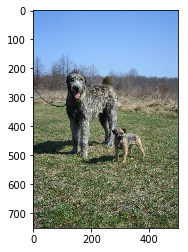

In [45]:
import matplotlib.image as mpimg

test = 99

dog = predict_breed_transfer(dog_files_short[test])

print(dog)

image = mpimg.imread(dog_files_short[test])

plt.imshow(image)
plt.show()

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [46]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    
    image = mpimg.imread(img_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    if face_detector(img_path):
        print("That's not a dog! But if they were...")
        print("...they'd be a", predict_breed_transfer(img_path))
    elif dog_detector_gen(img_path, ResNet34_predict):
        print("That's a good dog!")
        print("Hmmm...it looks like a", predict_breed_transfer(img_path))
    elif (dog_detector(img_path) and face_detector(img_path)) == False:
        print("There isn't a dog or a human in that image...")

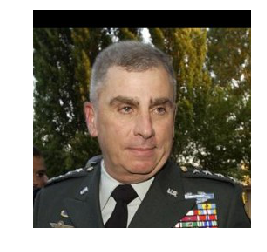

That's not a dog! But if they were...
...they'd be a Bluetick coonhound


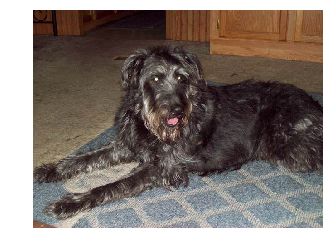

That's a good dog!
Hmmm...it looks like a Irish wolfhound


In [47]:
run_app(human_files_short[57])
run_app(dog_files_short[57])

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__

The output is pretty good! It got one of the dogs right even though it didn't think she was a dog, it got one dog wrong but his mix of breeds is nearly identical to the breed it predicted so it did very well, and it got one dog wrong.

Areas I'd like to improve my algorithm are 1) training a more accurate predictor 2) configuring it so that it can predict breed mixes for mutts 3) displaying an image of the predicted breed when a human is detected.

In [1]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

hum_paths = np.array(glob("human_files/*/*"))
dog_paths = np.array(glob("dog_files/*/*"))

## suggested code, below
for file in np.hstack((hum_paths[:3], dog_paths[:3])):
    run_app(file)

NameError: name 'np' is not defined